In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
vin_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift1/WineQT.csv")
vin_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
vin_df.shape

(1143, 13)

### Hur många datapunkter och attribut finns?

Shape visar oss antal rader och kolumner i vin datan. Antal datapunkter är då antal rader i detta fall 1143 st och antal attribut är antal kolumner som är 13 st.

In [10]:
vin_df["quality"].value_counts()


5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

### Hur många klasser av kvalitet finns det?

Inom kvalitet, med hjälp av value_counts(), så kan vi se de klasser som finns  (första kolumnen) och antal datapunkter som finns för respektive klass (andra kolumnen). 
Det är 6st rader, så det är 6 st klasser.

### Hur ser distributionen ut för de olika attributen?

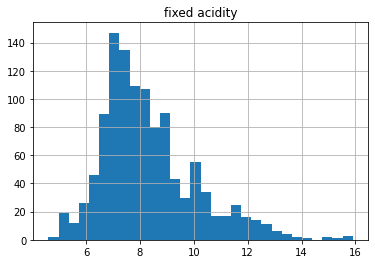

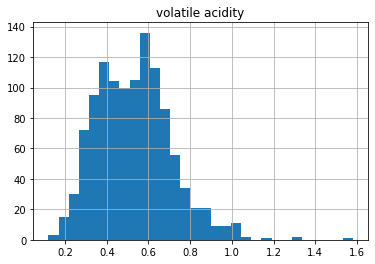

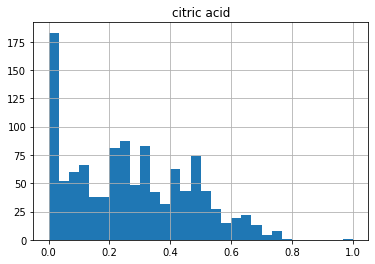

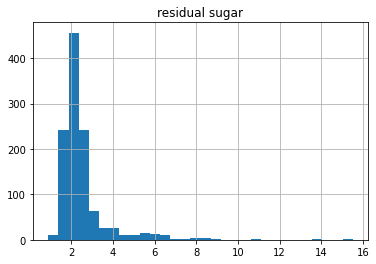

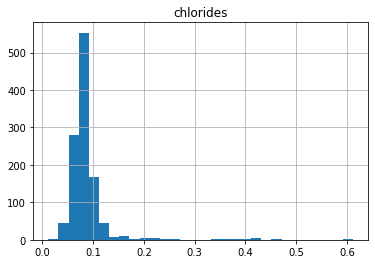

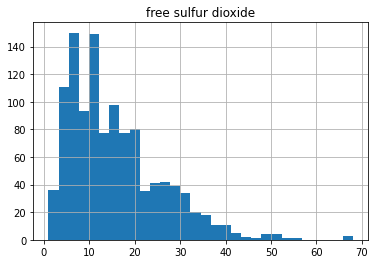

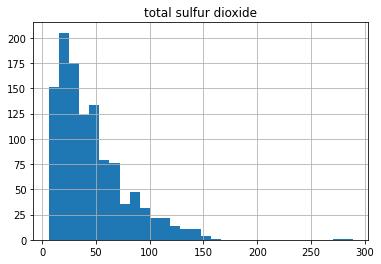

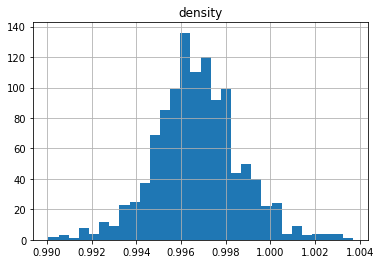

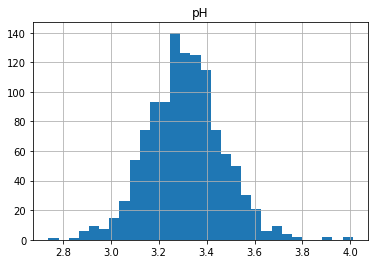

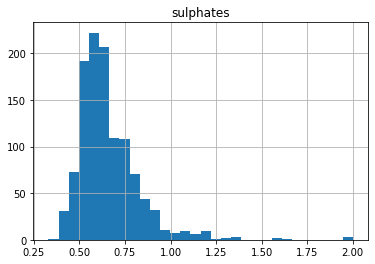

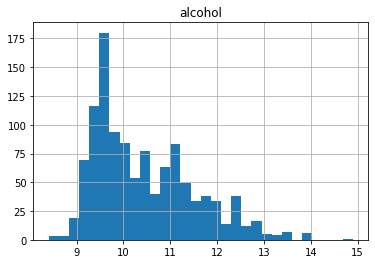

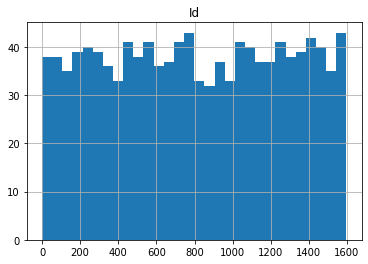

In [192]:
# Distributionen för de olika attributten:
ListaMedAttributer = [

    ["fixed acidity"],	["volatile acidity"],	    ["citric acid"],	     ["residual sugar"],	
    ["chlorides"],	    ["free sulfur dioxide"],	["total sulfur dioxide"],	
    ["density"],	    ["pH"],	  ["sulphates"],	["alcohol"],      ["Id"]
    
    ]

for attribut in ListaMedAttributer:
    vin_df[attribut].hist(bins=30)

### Finns det något attribut som inte borde användas?

ID-attributen har ingen påverkan på vinet så den kan man plocka bort.


In [193]:
# Delar upp datan i träning och testset
x = vin_df.drop(columns=["quality"])
y = vin_df.quality
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size = 0.3, random_state= 0)

# Kallar fram decission tree
decission_tree = DecisionTreeClassifier(random_state=0)

# Träning av decission tree med fit-funktionen
decission_tree.fit(x_train, y_train)

test_score = decission_tree.score(x_test, y_test)

print("Testscoren är:", test_score)




Testscoren är: 0.5860058309037901


### Hur djupt är trädet?

In [194]:
decission_tree.get_depth()

17

### Hur många löv har trädet?

In [195]:
decission_tree.get_n_leaves()

213

### Vilka attribut har störst påverkan?

<AxesSubplot:>

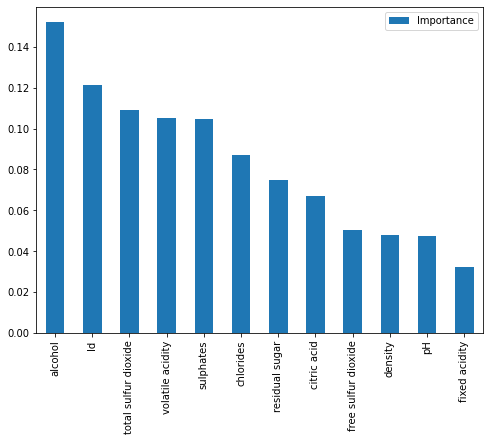

In [196]:
attribute_importance = pd.DataFrame(decission_tree.feature_importances_, index = x.columns, columns=["Importance"] )
attribute_importance.sort_values(by='Importance', ascending=False, inplace=True)
attribute_importance.plot(kind='bar', figsize=(8,6))

Diagramet visar hur stor påverkan de alla attributen har, enligt den är då "Alcohol" på första plats, och om vi bortser ID så kan man säga att "total sulfur dioxide" ligger på andra plats.

In [197]:
##### VG uppgifterna #####
train_score = decission_tree.score(x_train, y_train)
test_score = decission_tree.score(x_test, y_test)

print("Train:", train_score) 
print("Test:", test_score)


Train: 1.0
Test: 0.5860058309037901


In [198]:
# Testar att få värderna på test och träning mindre skilda genom att ändra antalet "min_samples_leaf"
decission_tree_2 = DecisionTreeClassifier(random_state=0, min_samples_leaf= 58)
decission_tree_2.fit(x_train, y_train)

train_score = decission_tree_2.score(x_train, y_train)
test_score = decission_tree_2.score(x_test, y_test)

print("Train:", train_score) 
print("Test:", test_score)

Train: 0.595
Test: 0.6005830903790087


In [199]:
# Bästa närmaste värdet mellan train och test, med hjälp av "ccp_alpha"
decission_tree_3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
decission_tree_3.fit(x_train, y_train)

train_score = decission_tree_3.score(x_train, y_train)
test_score = decission_tree_3.score(x_test, y_test)

print("Train:", train_score) 
print("Test:", test_score)

Train: 0.59375
Test: 0.5918367346938775


### Jämför träningscore och testscore:

-Hur skiljer de sig och varför?
Träningscore har fått 1.0 och testscore har fått 0.59. De skiljer sig med 0.41, vilket är inte bra då målet är att de ligger så nära varandra så möjligt.
Här kan man dra slutsatsen att träningen har blivit overfittad eftersom den ligger på 1.0. Detta i sin tur leder till eller är orsaken att testscoren skiljer sig mycket från träningscoren.


-Finns det något att göra åt fenomenet?
Ja man kan minska djupet på trädet eller att ange mer antal samples som jag har gjort. Genom att göra så, så kommer man att minska risken för overfitting och ge en mindre skild resultat mellan test och träning. För mig har det minsta antalet samples varit på 58 för att de skulle få nästan likadanna värden. 
Att minska djupet på trädet går också bra att göra med "max_depth" eller "ccp_alpha". 

### Vanliga decission_tree

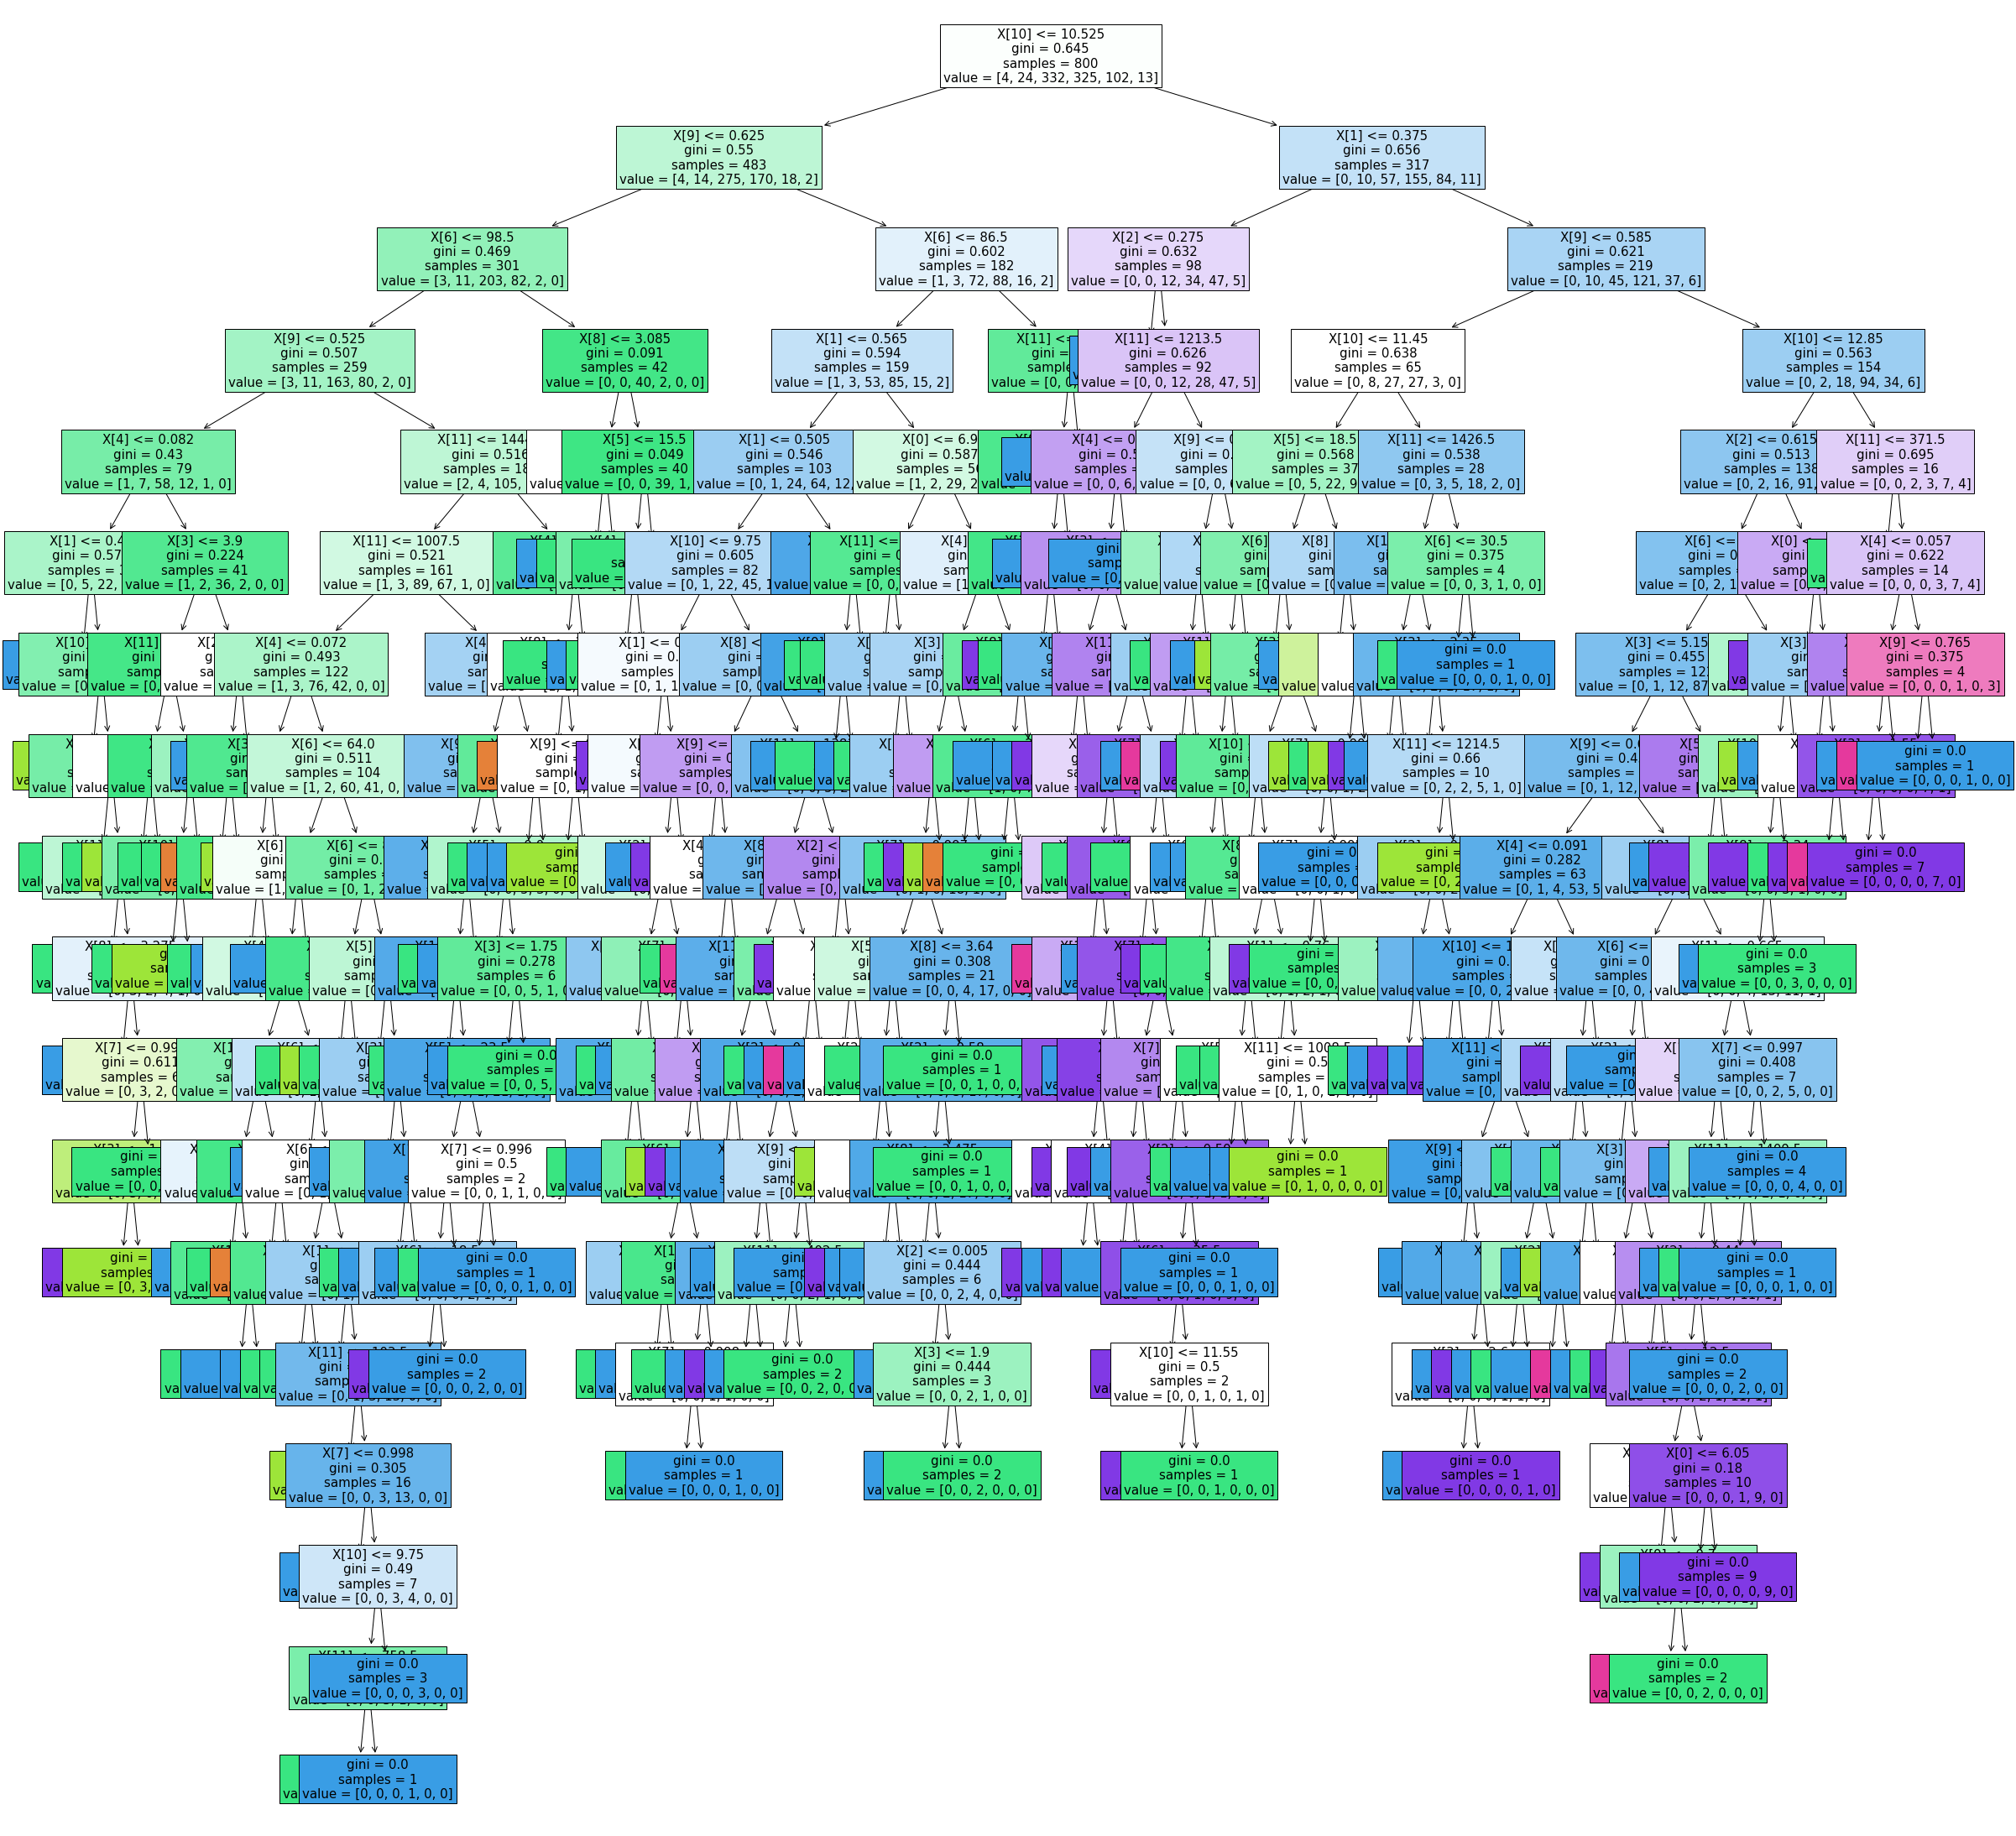

In [200]:
tree_figure=plt.figure(figsize=(40,40))
pl= plot_tree(decission_tree,fontsize=15,filled=True)

### Träd med 58 st samples

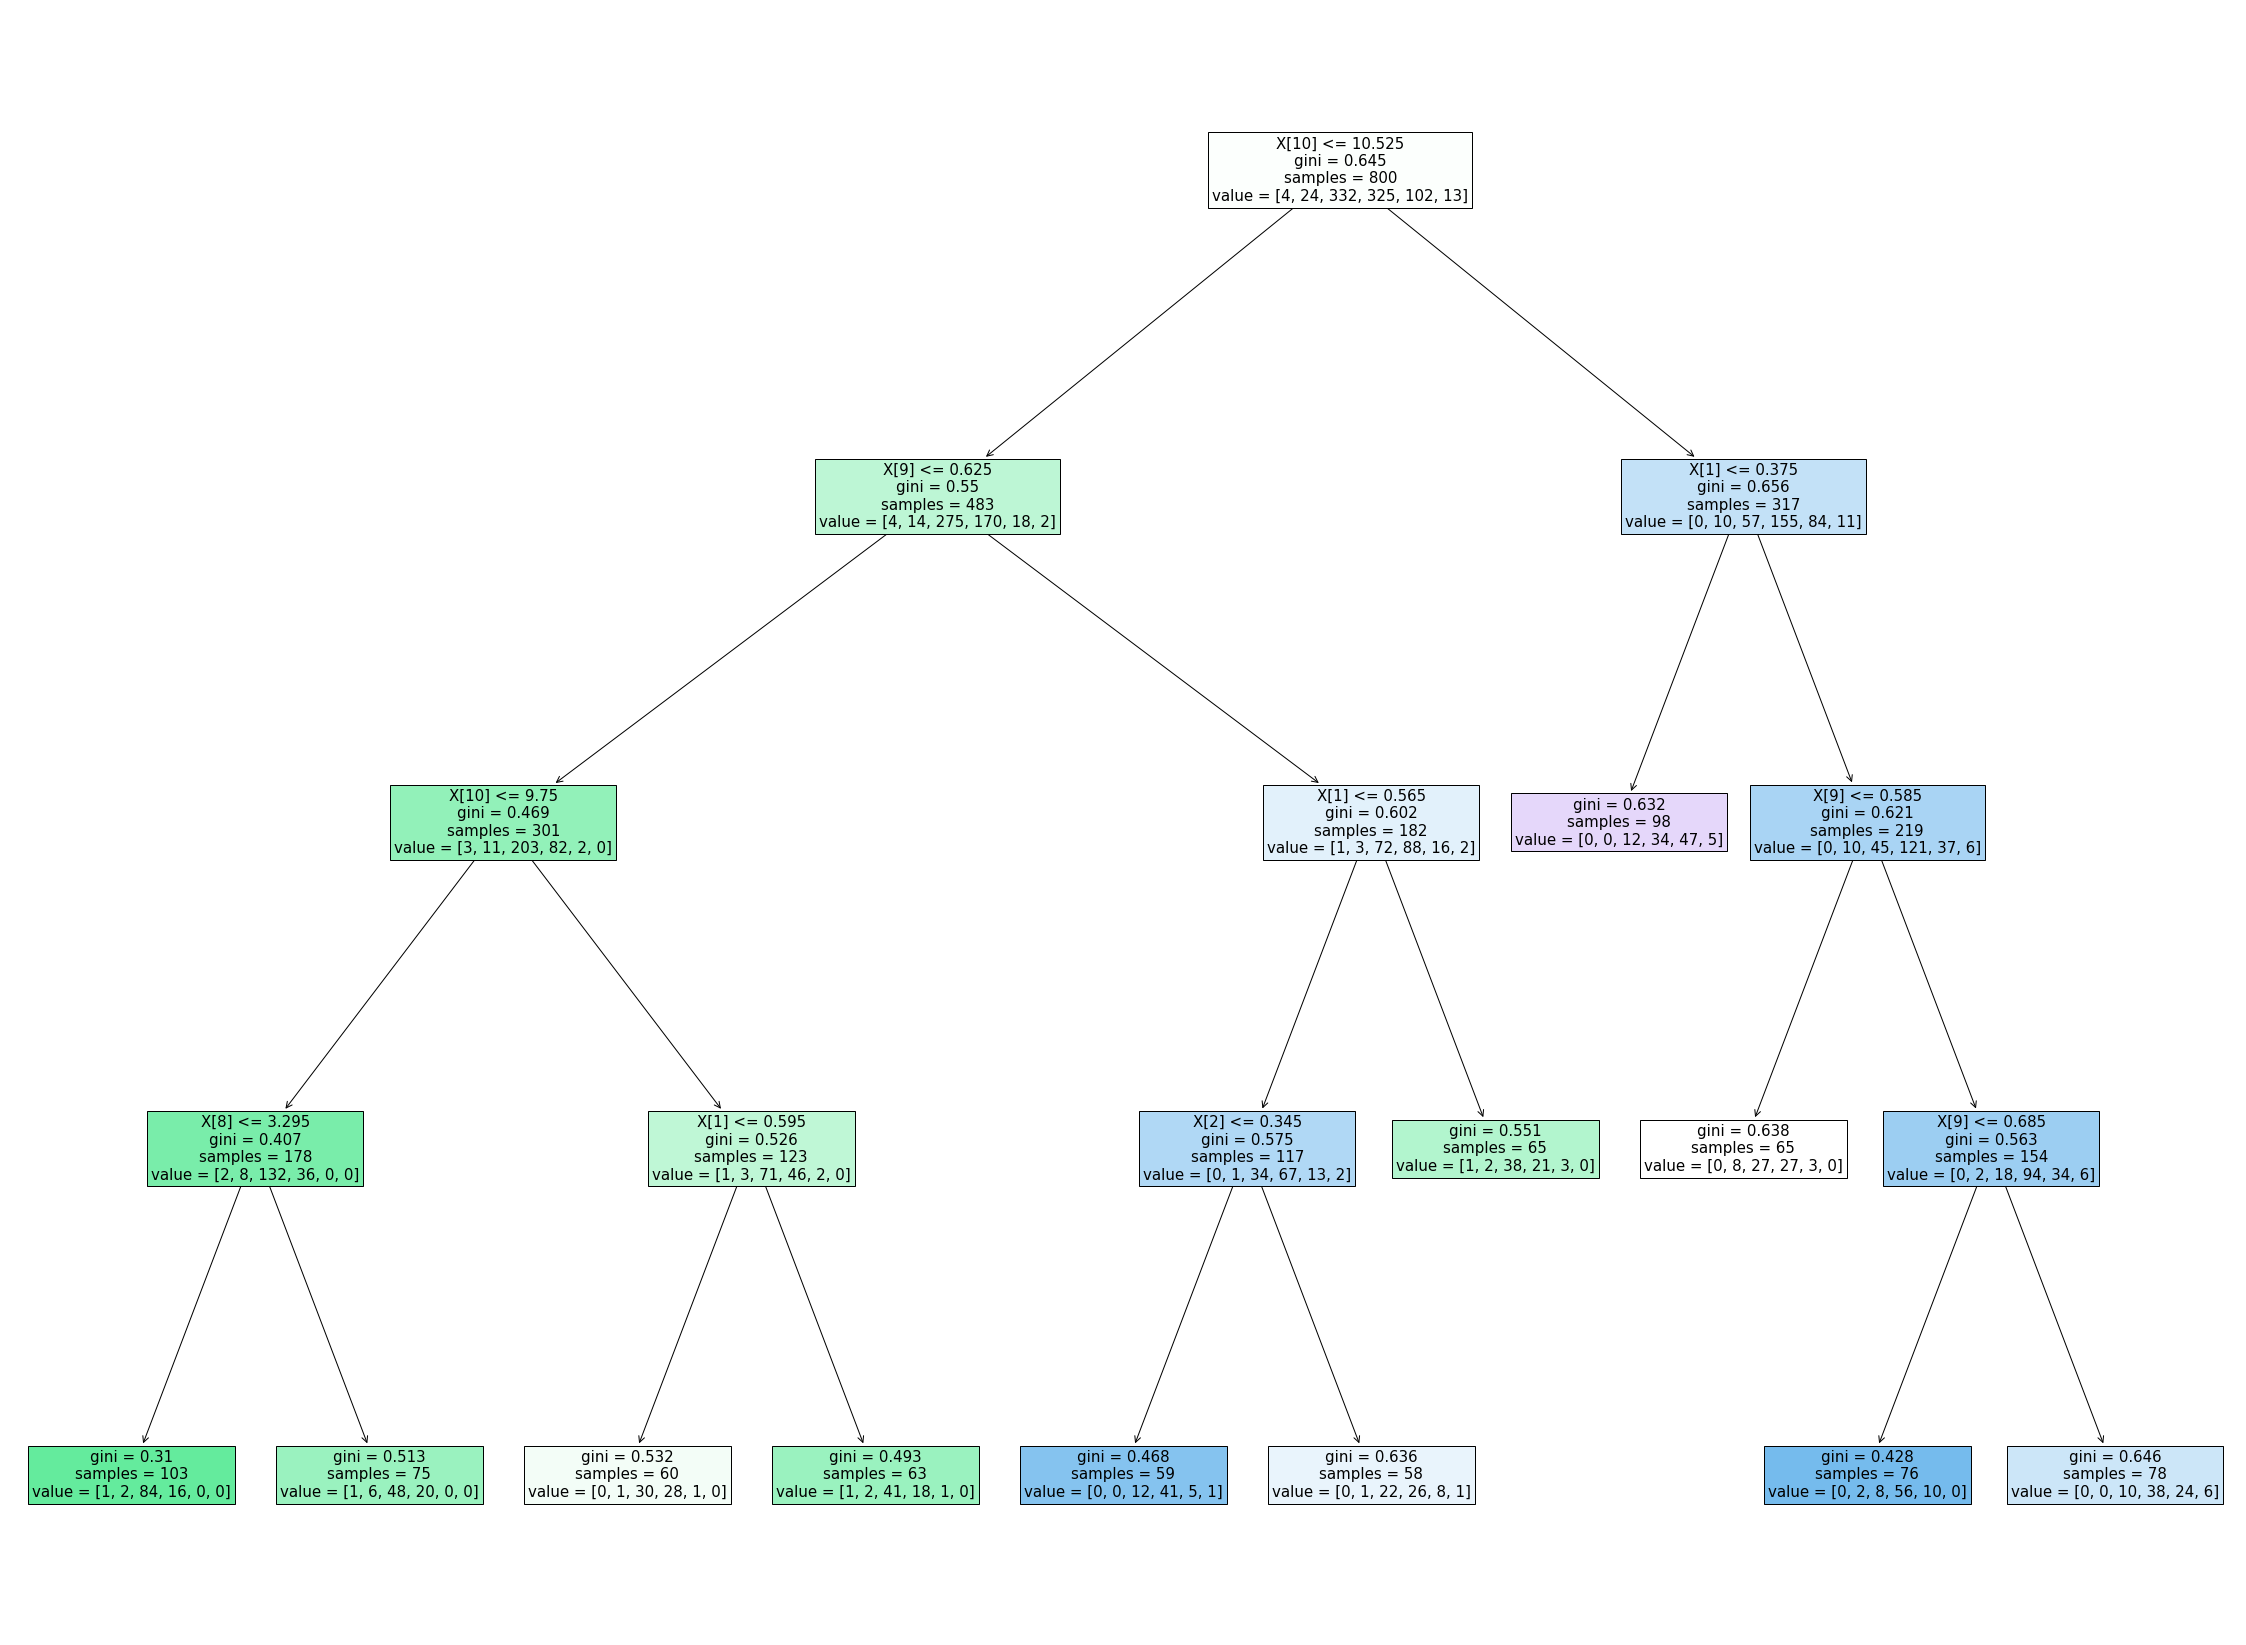

In [201]:
tree_figure=plt.figure(figsize=(40,30))
pl= plot_tree(decission_tree_2,fontsize=15,filled=True)

### Träd med 0.01 ccp_alpha

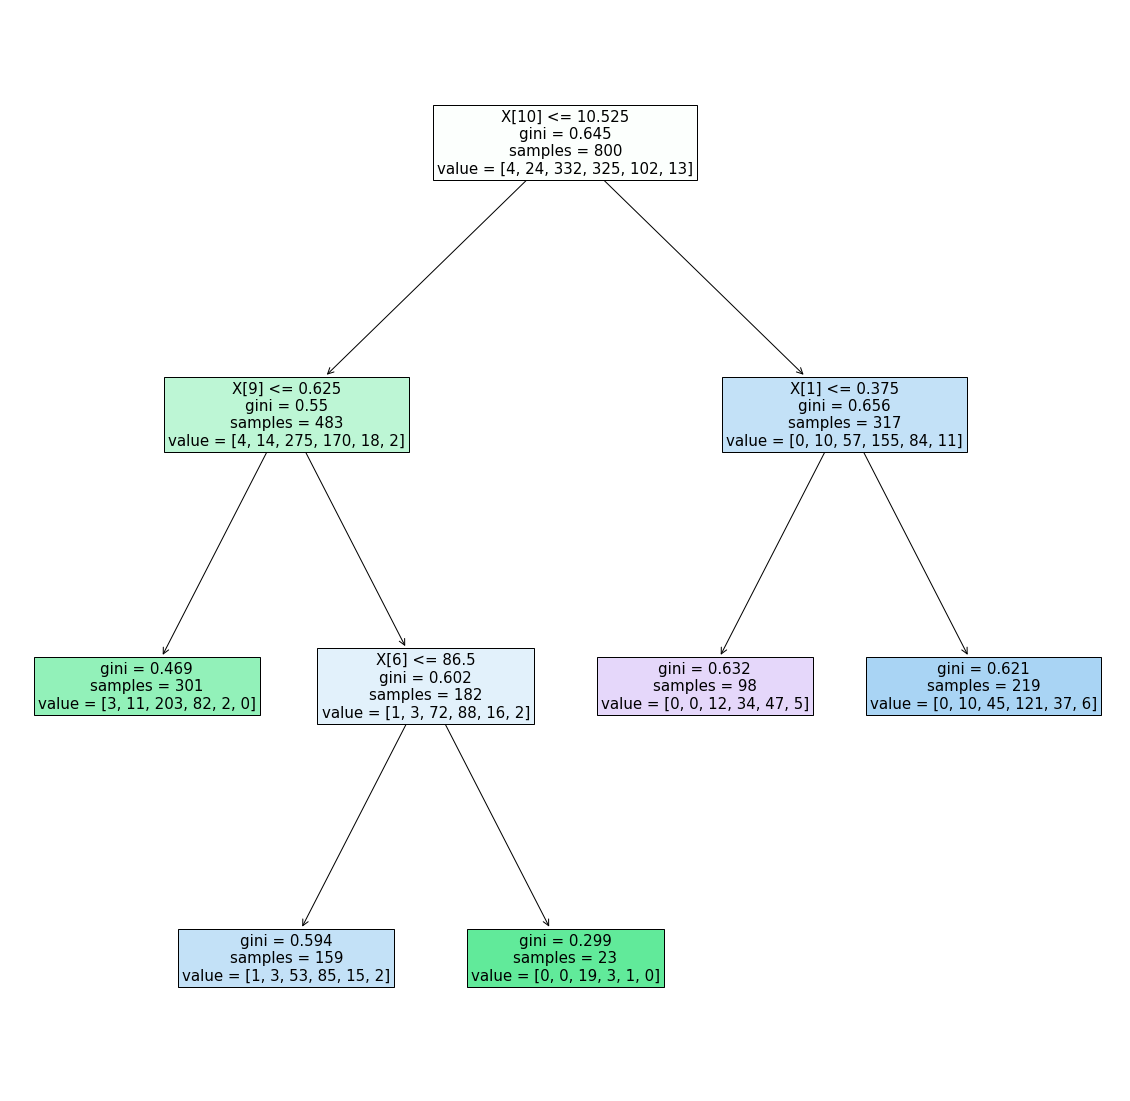

In [202]:
tree_figure=plt.figure(figsize=(20,20))
pl= plot_tree(decission_tree_3,fontsize=15,filled=True)

### Hur många grenar kommer det maximalt från en nod?

Det kommer 2 grenar maximalt.

### Varför är det max så många grenar från en nod?

Först och främst är det inplementerat i sklearn att det är just 2st grenar. Sen är det också så att det blir lättare att komma fram till svar när det är endast en "stämmer" eller "stämmer inte" fråga. Dock har jag insett en nackdel med det, vilket är att trädets djup blir längre/djupare.